Loading necessary libraries

In [1]:
import sys
sys.path.append("..")
from tensorflow.python.summary.summary_iterator import summary_iterator
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np

Disabling warnings for a clean preview. Comment the next block for the default state.

In [2]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

Necessary Variables

In [3]:
LOG_DIR = '../logs/'
LOGS = []
ALL_DATA = {}
HIGH_QUALITY_IMAGES = False

Here, we list the relevant log files from the training process

In [4]:
# Going through all files
for root, dirs, files in os.walk(LOG_DIR):
    for file in files:
        # Ignoring unnecessary results
        if root.find('logs') < 0:
            continue
        if not file.endswith('.v2'):
            continue
        if root.find('_level_') < 0:
            continue
        # Keeping the path to relevant files in memory
        LOGS.append(f'{root}/{file}')


Here we load the information within the log files into memory

In [5]:
# Loading the data from each relevant log file
for log in LOGS:
    ALL_DATA[log] = {'loss': [], 'accuracy': [], 'f1': [], 'start':None, 'end':None}
    for summary in summary_iterator(log):
        if not ALL_DATA[log]['start']:
            ALL_DATA[log]['start'] = float(summary.wall_time)
        ALL_DATA[log]['end'] = float(summary.wall_time)
        if len(summary.summary.value):
            if summary.summary.value[0].tag == 'epoch_loss':
                ALL_DATA[log]['loss'].append(summary.summary.value[0].simple_value)
            if summary.summary.value[0].tag == 'epoch_accuracy':
                ALL_DATA[log]['accuracy'].append(summary.summary.value[0].simple_value)
            if summary.summary.value[0].tag == 'epoch_f1':
                ALL_DATA[log]['f1'].append(summary.summary.value[0].simple_value)

Some helper functions

In [6]:
# Function to load relevant data into a python array
def get_accuracy_data_numpy(exp_keys, key_include):
    arr = np.ndarray(shape=(0,len(ALL_DATA[exp_keys[0]]['accuracy'])))
    for key in exp_keys:
        if key_include not in key:
            continue
        arr = np.append(arr, [ALL_DATA[key]['accuracy']], axis=0)
    return arr

def get_f1_data_numpy(exp_keys, key_include):
    arr = np.ndarray(shape=(0,len(ALL_DATA[exp_keys[0]]['f1'])))
    for key in exp_keys:
        if key_include not in key:
            continue
        arr = np.append(arr, [ALL_DATA[key]['f1']], axis=0)
    return arr

# Function to load relevant time data
def get_time_in_seconds(exp_keys, key_include):
    times = []
    for key in exp_keys:
        if key_include not in key:
            continue
        times.append(ALL_DATA[key]['end']-ALL_DATA[key]['start'])
    return times

# Function for creating accuracy per epoch plots
def plot_all_and_average_accuracy(exp_keys, title=None, save=False):
    fig = plt.figure(dpi=300 if HIGH_QUALITY_IMAGES else 72, figsize=(7, 6))
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.rcParams['savefig.facecolor'] = 'w'

    ax = fig.gca()
    ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: '{:.0f} %'.format(x*100)))

    data_train = get_accuracy_data_numpy(exp_keys, 'train')
    data_valid = get_accuracy_data_numpy(exp_keys, 'valid')
    linewidth = 2

    for row in data_train:
        plt.plot(row, color='#E2EDF3', linewidth=linewidth)
    for row in data_valid:
        plt.plot(row, color='#E2F3F2', linewidth=linewidth)
    plt.plot(np.mean(data_train, axis=0), color='#4889AD', label='Average Training Accuracy', linewidth=linewidth)
    plt.plot(np.mean(data_valid, axis=0), color='#52B7B0',label='Average Validation Accuracy', linewidth=linewidth)

    plt.grid(axis='y')
    plt.legend(loc='lower right')
    if title:
        plt.title(title)
    if save:
        plt.savefig(save)
    else:
        plt.show()

# Function for creating f1 per epoch plots
def plot_all_and_average_f1(exp_keys, title=None, save=False):
    fig = plt.figure(dpi=300 if HIGH_QUALITY_IMAGES else 72, figsize=(7, 6))
    plt.ylabel('F1 Score')
    plt.xlabel('Epochs')
    plt.rcParams['savefig.facecolor'] = 'w'

    ax = fig.gca()
    # ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: '{:.0f}'.format(x*100)))

    data_train = get_f1_data_numpy(exp_keys, 'train')
    data_valid = get_f1_data_numpy(exp_keys, 'valid')
    linewidth = 2

    for row in data_train:
        plt.plot(row, color='#E2EDF3', linewidth=linewidth)
    for row in data_valid:
        plt.plot(row, color='#E2F3F2', linewidth=linewidth)
    plt.plot(np.mean(data_train, axis=0), color='#4889AD', label='Average Training F1 Score', linewidth=linewidth)
    plt.plot(np.mean(data_valid, axis=0), color='#52B7B0',label='Average Validation F1 Score', linewidth=linewidth)

    plt.grid(axis='y')
    plt.legend(loc='lower right')
    if title:
        plt.title(title)
    if save:
        plt.savefig(save)
    else:
        plt.show()

Creating Accuracy Per Epoch Plots for CNN Experiments

Average Training Time: 139.60603737831116, Average Validation Time: 139.00717251300813


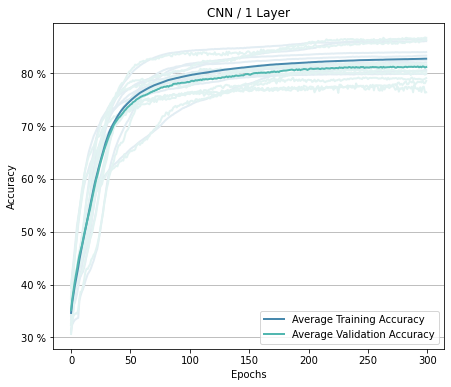

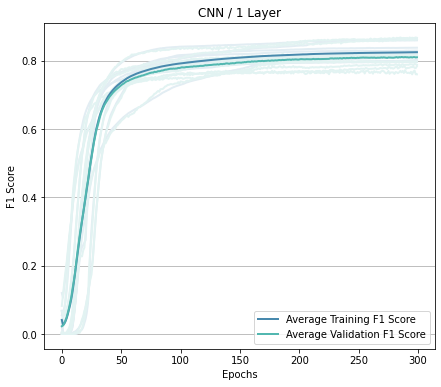

In [7]:
# CNN Experiment 1

cnn1 = []
for key in ALL_DATA.keys():
    if 'cnn_level_1/' in key:
        cnn1.append(key)

cnn1_train_time = np.mean(get_time_in_seconds(cnn1, 'train'))
cnn1_valid_time = np.mean(get_time_in_seconds(cnn1, 'valid'))
print(f'Average Training Time: {cnn1_train_time}, Average Validation Time: {cnn1_valid_time}')

plot_all_and_average_accuracy(cnn1, 'CNN / 1 Layer', save='cnn1_acc.pdf')
plot_all_and_average_f1(cnn1, 'CNN / 1 Layer', save='cnn1_f1.pdf')

Average Training Time: 149.94963531494142, Average Validation Time: 149.35082008838654


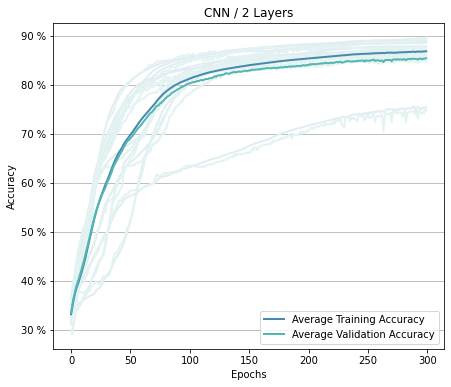

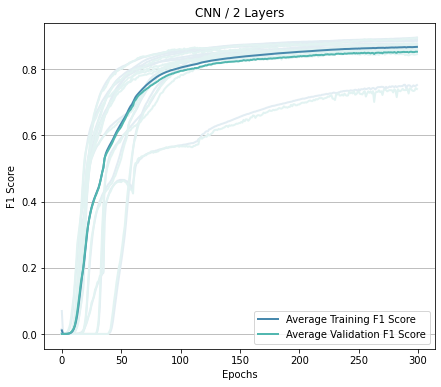

In [8]:
# CNN Experiment 2

cnn2 = []
for key in ALL_DATA.keys():
    if 'cnn_level_2/' in key:
        cnn2.append(key)

cnn2_train_time = np.mean(get_time_in_seconds(cnn2, 'train'))
cnn2_valid_time = np.mean(get_time_in_seconds(cnn2, 'valid'))
print(f'Average Training Time: {cnn2_train_time}, Average Validation Time: {cnn2_valid_time}')


plot_all_and_average_accuracy(cnn2, 'CNN / 2 Layers', save='cnn2_acc.png')
plot_all_and_average_f1(cnn2, 'CNN / 2 Layers', save='cnn2_f1.png')

Average Training Time: 159.08420219421387, Average Validation Time: 158.68538618087769


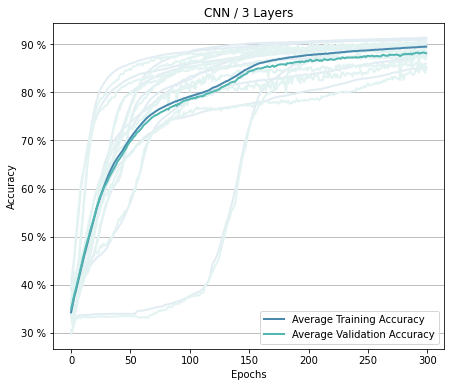

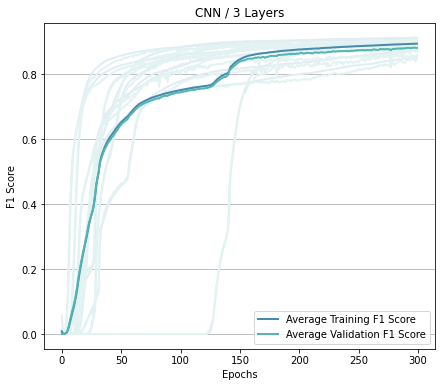

In [9]:
# CNN Experiment 3

cnn3 = []
for key in ALL_DATA.keys():
    if 'cnn_level_3/' in key:
        cnn3.append(key)
        
cnn3_train_time = np.mean(get_time_in_seconds(cnn3, 'train'))
cnn3_valid_time = np.mean(get_time_in_seconds(cnn3, 'valid'))
print(f'Average Training Time: {cnn3_train_time}, Average Validation Time: {cnn3_valid_time}')

plot_all_and_average_accuracy(cnn3, 'CNN / 3 Layers', save='cnn3_acc.png')
plot_all_and_average_f1(cnn3, 'CNN / 3 Layers', save='cnn3_f1.png')

Average Training Time: 170.53461377620698, Average Validation Time: 169.63586981296538


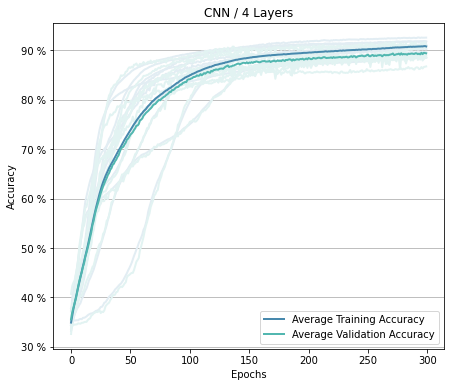

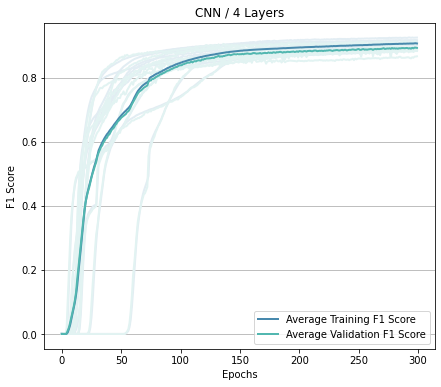

In [10]:
# CNN Experiment 4

cnn4 = []
for key in ALL_DATA.keys():
    if 'cnn_level_4/' in key:
        cnn4.append(key)
        
cnn4_train_time = np.mean(get_time_in_seconds(cnn4, 'train'))
cnn4_valid_time = np.mean(get_time_in_seconds(cnn4, 'valid'))
print(f'Average Training Time: {cnn4_train_time}, Average Validation Time: {cnn4_valid_time}')

plot_all_and_average_accuracy(cnn4, 'CNN / 4 Layers', save='cnn4_acc.png')
plot_all_and_average_f1(cnn4, 'CNN / 4 Layers', save='cnn4_f1.png')

Average Training Time: 181.09738941192626, Average Validation Time: 180.29860649108886


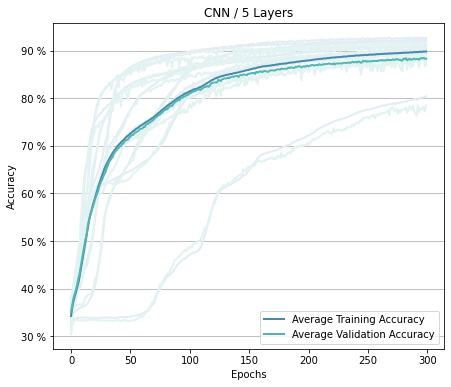

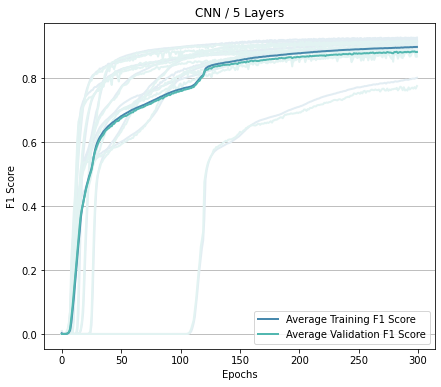

In [11]:
# CNN Experiment 5

cnn5 = []
for key in ALL_DATA.keys():
    if 'cnn_level_5/' in key:
        cnn5.append(key)
        
cnn5_train_time = np.mean(get_time_in_seconds(cnn5, 'train'))
cnn5_valid_time = np.mean(get_time_in_seconds(cnn5, 'valid'))
print(f'Average Training Time: {cnn5_train_time}, Average Validation Time: {cnn5_valid_time}')

plot_all_and_average_accuracy(cnn5, 'CNN / 5 Layers', save='cnn5_acc.png')
plot_all_and_average_f1(cnn5, 'CNN / 5 Layers', save='cnn5_f1.png')

Saving the maximum average accuracy and run time per experiment for later analysis

In [12]:
acc_data_layer_1 = get_accuracy_data_numpy(cnn1, 'valid')
acc_data_layer_2 = get_accuracy_data_numpy(cnn2, 'valid')
acc_data_layer_3 = get_accuracy_data_numpy(cnn3, 'valid')
acc_data_layer_4 = get_accuracy_data_numpy(cnn4, 'valid')
acc_data_layer_5 = get_accuracy_data_numpy(cnn5, 'valid')

acc_mean_1 = np.max(np.mean(acc_data_layer_1, axis=0))
acc_mean_2 = np.max(np.mean(acc_data_layer_2, axis=0))
acc_mean_3 = np.max(np.mean(acc_data_layer_3, axis=0))
acc_mean_4 = np.max(np.mean(acc_data_layer_4, axis=0))
acc_mean_5 = np.max(np.mean(acc_data_layer_5, axis=0))
acc_cnn_arr_mean = [acc_mean_1, acc_mean_2, acc_mean_3, acc_mean_4, acc_mean_5]

acc_max_1 = np.max(acc_data_layer_1)
acc_max_2 = np.max(acc_data_layer_2)
acc_max_3 = np.max(acc_data_layer_3)
acc_max_4 = np.max(acc_data_layer_4)
acc_max_5 = np.max(acc_data_layer_5)
acc_cnn_arr_max = [acc_max_1, acc_max_2, acc_max_3, acc_max_4, acc_max_5]

In [13]:
f1_data_layer_1 = get_f1_data_numpy(cnn1, 'valid')
f1_data_layer_2 = get_f1_data_numpy(cnn2, 'valid')
f1_data_layer_3 = get_f1_data_numpy(cnn3, 'valid')
f1_data_layer_4 = get_f1_data_numpy(cnn4, 'valid')
f1_data_layer_5 = get_f1_data_numpy(cnn5, 'valid')

f1_mean_1 = np.max(np.mean(f1_data_layer_1, axis=0))
f1_mean_2 = np.max(np.mean(f1_data_layer_2, axis=0))
f1_mean_3 = np.max(np.mean(f1_data_layer_3, axis=0))
f1_mean_4 = np.max(np.mean(f1_data_layer_4, axis=0))
f1_mean_5 = np.max(np.mean(f1_data_layer_5, axis=0))
f1_cnn_arr_mean = [f1_mean_1, f1_mean_2, f1_mean_3, f1_mean_4, f1_mean_5]

f1_max_1 = np.max(f1_data_layer_1)
f1_max_2 = np.max(f1_data_layer_2)
f1_max_3 = np.max(f1_data_layer_3)
f1_max_4 = np.max(f1_data_layer_4)
f1_max_5 = np.max(f1_data_layer_5)
f1_cnn_arr_max = [f1_max_1, f1_max_2, f1_max_3, f1_max_4, f1_max_5]

In [14]:
cnn_time = [cnn1_train_time, cnn2_train_time, cnn3_train_time, cnn4_train_time, cnn5_train_time]

Creating Accuracy Per Epoch Plots for BLSTM Experiments

Average Training Time: 523.5599046468735, Average Validation Time: 520.9613322734833


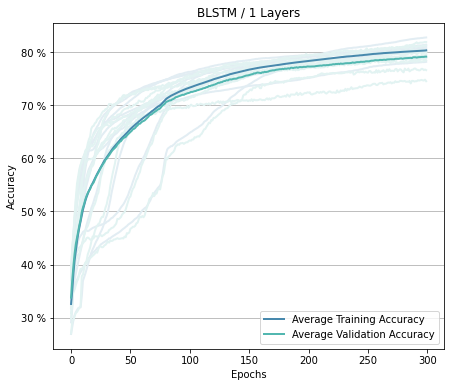

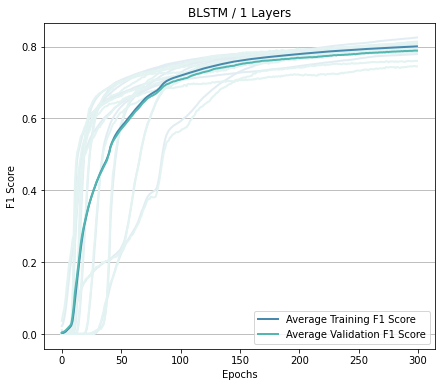

In [15]:
# BLSTM Experiment 1

blstm1 = []
for key in ALL_DATA.keys():
    if 'blstm_level_1/' in key:
        blstm1.append(key)
        
blstm1_train_time = np.mean(get_time_in_seconds(blstm1, 'train'))
blstm1_valid_time = np.mean(get_time_in_seconds(blstm1, 'valid'))
print(f'Average Training Time: {blstm1_train_time}, Average Validation Time: {blstm1_valid_time}')

plot_all_and_average_accuracy(blstm1, 'BLSTM / 1 Layers', save='blstm1_acc.png')
plot_all_and_average_f1(blstm1, 'BLSTM / 1 Layers', save='blstm1_f1.png')

Average Training Time: 927.6851801156997, Average Validation Time: 923.4865440368652


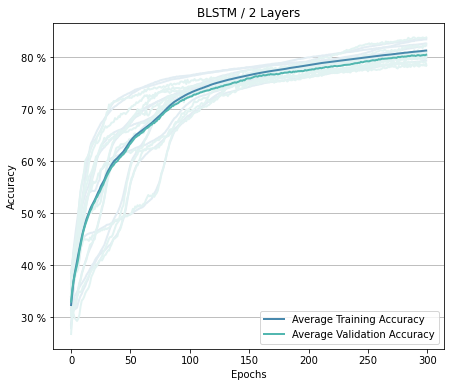

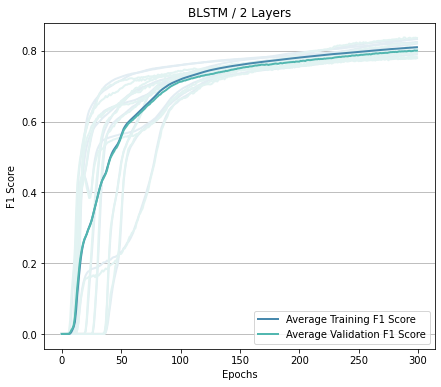

In [16]:
# BLSTM Experiment 2

blstm2 = []
for key in ALL_DATA.keys():
    if 'blstm_level_2/' in key:
        blstm2.append(key)
        
blstm2_train_time = np.mean(get_time_in_seconds(blstm2, 'train'))
blstm2_valid_time = np.mean(get_time_in_seconds(blstm2, 'valid'))
print(f'Average Training Time: {blstm2_train_time}, Average Validation Time: {blstm2_valid_time}')

plot_all_and_average_accuracy(blstm2, 'BLSTM / 2 Layers', save='blstm2_acc.png')
plot_all_and_average_f1(blstm2, 'BLSTM / 2 Layers', save='blstm2_f1.png')

Average Training Time: 1322.2184383630752, Average Validation Time: 1316.419838476181


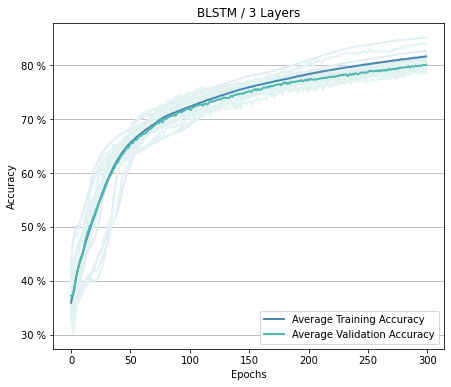

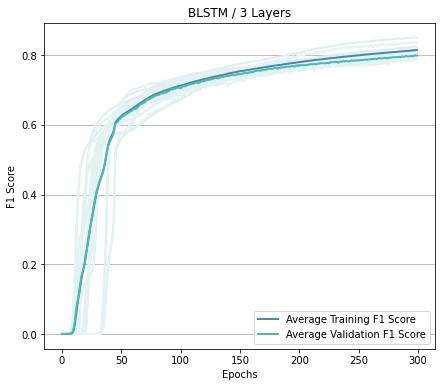

In [17]:
# BLSTM Experiment 3

blstm3 = []
for key in ALL_DATA.keys():
    if 'blstm_level_3/' in key:
        blstm3.append(key)
        
blstm3_train_time = np.mean(get_time_in_seconds(blstm3, 'train'))
blstm3_valid_time = np.mean(get_time_in_seconds(blstm3, 'valid'))
print(f'Average Training Time: {blstm3_train_time}, Average Validation Time: {blstm3_valid_time}')

plot_all_and_average_accuracy(blstm3,'BLSTM / 3 Layers', save='blstm3_acc.png')
plot_all_and_average_f1(blstm3,'BLSTM / 3 Layers', save='blstm3_f1.png')

Average Training Time: 1704.0301543235778, Average Validation Time: 1696.1314910888673


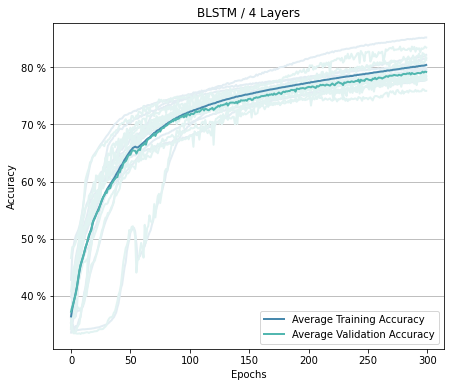

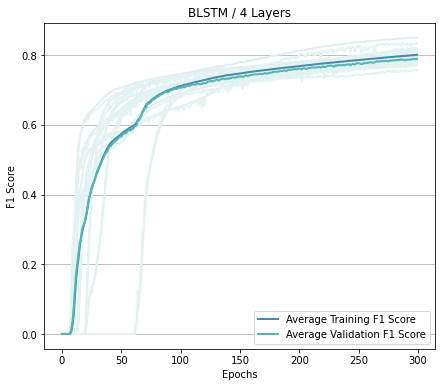

In [18]:
# BLSTM Experiment 4

blstm4 = []
for key in ALL_DATA.keys():
    if 'blstm_level_4/' in key:
        blstm4.append(key)
        
blstm4_train_time = np.mean(get_time_in_seconds(blstm4, 'train'))
blstm4_valid_time = np.mean(get_time_in_seconds(blstm4, 'valid'))
print(f'Average Training Time: {blstm4_train_time}, Average Validation Time: {blstm4_valid_time}')

plot_all_and_average_accuracy(blstm4, 'BLSTM / 4 Layers', save='blstm4_acc.png')
plot_all_and_average_f1(blstm4, 'BLSTM / 4 Layers', save='blstm4_f1.png')

Average Training Time: 2079.1079317808153, Average Validation Time: 2069.7092452526094


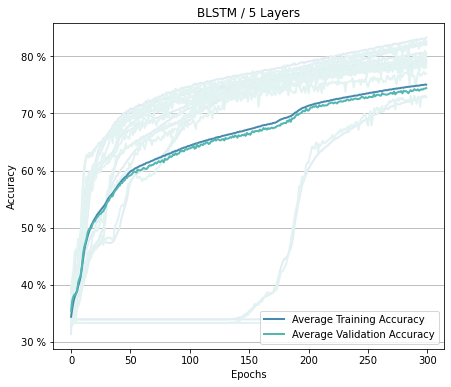

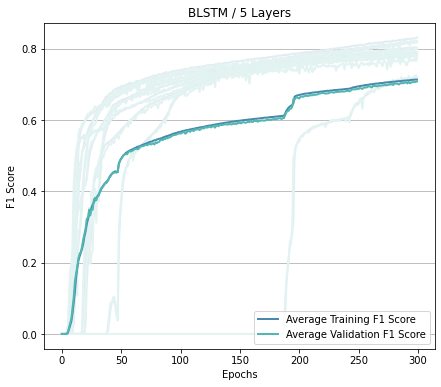

In [19]:
# BLSTM Experiment 5

blstm5 = []
for key in ALL_DATA.keys():
    if 'blstm_level_5/' in key:
        blstm5.append(key)
        
blstm5_train_time = np.mean(get_time_in_seconds(blstm5, 'train'))
blstm5_valid_time = np.mean(get_time_in_seconds(blstm5, 'valid'))
print(f'Average Training Time: {blstm5_train_time}, Average Validation Time: {blstm5_valid_time}')

plot_all_and_average_accuracy(blstm5, 'BLSTM / 5 Layers', save='blstm5_acc.png')
plot_all_and_average_f1(blstm5, 'BLSTM / 5 Layers', save='blstm5_f1.png')

Saving the maximum average accuracy and run time per experiment for later analysis

In [20]:
acc_data_layer_1 = get_accuracy_data_numpy(blstm1, 'valid')
acc_data_layer_2 = get_accuracy_data_numpy(blstm2, 'valid')
acc_data_layer_3 = get_accuracy_data_numpy(blstm3, 'valid')
acc_data_layer_4 = get_accuracy_data_numpy(blstm4, 'valid')
acc_data_layer_5 = get_accuracy_data_numpy(blstm5, 'valid')

acc_mean_1 = np.max(np.mean(acc_data_layer_1, axis=0))
acc_mean_2 = np.max(np.mean(acc_data_layer_2, axis=0))
acc_mean_3 = np.max(np.mean(acc_data_layer_3, axis=0))
acc_mean_4 = np.max(np.mean(acc_data_layer_4, axis=0))
acc_mean_5 = np.max(np.mean(acc_data_layer_5, axis=0))
acc_blstm_arr_mean = [acc_mean_1, acc_mean_2, acc_mean_3, acc_mean_4, acc_mean_5]

acc_max_1 = np.max(acc_data_layer_1)
acc_max_2 = np.max(acc_data_layer_2)
acc_max_3 = np.max(acc_data_layer_3)
acc_max_4 = np.max(acc_data_layer_4)
acc_max_5 = np.max(acc_data_layer_5)
acc_blstm_arr_max = [acc_max_1, acc_max_2, acc_max_3, acc_max_4, acc_max_5]

In [21]:
f1_data_layer_1 = get_f1_data_numpy(blstm1, 'valid')
f1_data_layer_2 = get_f1_data_numpy(blstm2, 'valid')
f1_data_layer_3 = get_f1_data_numpy(blstm3, 'valid')
f1_data_layer_4 = get_f1_data_numpy(blstm4, 'valid')
f1_data_layer_5 = get_f1_data_numpy(blstm5, 'valid')

f1_mean_1 = np.max(np.mean(f1_data_layer_1, axis=0))
f1_mean_2 = np.max(np.mean(f1_data_layer_2, axis=0))
f1_mean_3 = np.max(np.mean(f1_data_layer_3, axis=0))
f1_mean_4 = np.max(np.mean(f1_data_layer_4, axis=0))
f1_mean_5 = np.max(np.mean(f1_data_layer_5, axis=0))
f1_blstm_arr_mean = [acc_mean_1, acc_mean_2, acc_mean_3, acc_mean_4, acc_mean_5]

f1_max_1 = np.max(f1_data_layer_1)
f1_max_2 = np.max(f1_data_layer_2)
f1_max_3 = np.max(f1_data_layer_3)
f1_max_4 = np.max(f1_data_layer_4)
f1_max_5 = np.max(f1_data_layer_5)
f1_blstm_arr_max = [acc_max_1, acc_max_2, acc_max_3, acc_max_4, acc_max_5]

In [22]:
blstm_time = [blstm1_train_time, blstm2_train_time, blstm3_train_time, blstm4_train_time, blstm5_train_time]

Creating Accuracy Per Epoch Plots for BLSTM Extended Experiments

Average Training Time: 1784.3573172807694, Average Validation Time: 1781.6585965871811


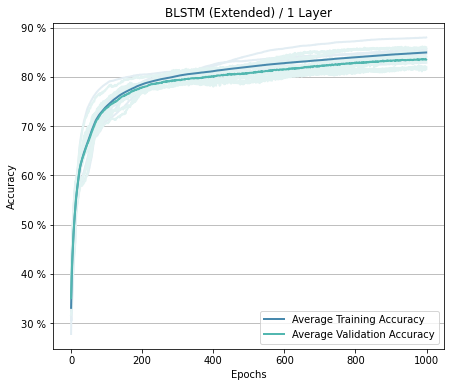

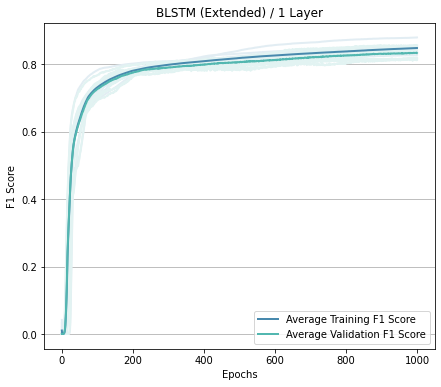

In [23]:
# BLSTM Extended Experiment 1

blstm1 = []
for key in ALL_DATA.keys():
    if 'blstm_level_1_extended/' in key:
        blstm1.append(key)
        
blstm1_train_time = np.mean(get_time_in_seconds(blstm1, 'train'))
blstm1_valid_time = np.mean(get_time_in_seconds(blstm1, 'valid'))
print(f'Average Training Time: {blstm1_train_time}, Average Validation Time: {blstm1_valid_time}')

plot_all_and_average_accuracy(blstm1, 'BLSTM (Extended) / 1 Layer', save='blstm1_ext_acc.png')
plot_all_and_average_f1(blstm1, 'BLSTM (Extended) / 1 Layer', save='blstm1_ext_f1.png')

Average Training Time: 3115.1944292545318, Average Validation Time: 3110.5957587718963


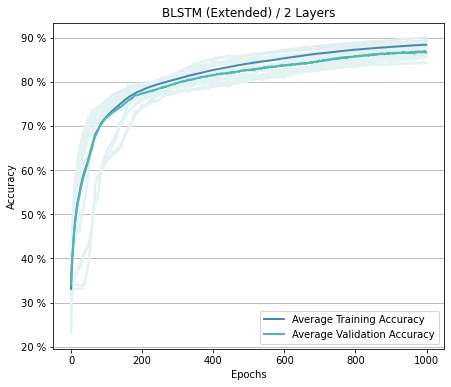

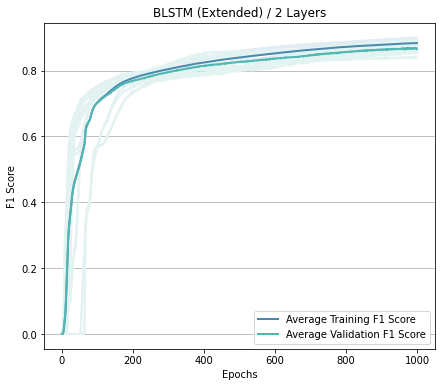

In [24]:
# BLSTM Extended Experiment 2

blstm2 = []
for key in ALL_DATA.keys():
    if 'blstm_level_2_extended/' in key:
        blstm2.append(key)
        
blstm2_train_time = np.mean(get_time_in_seconds(blstm2, 'train'))
blstm2_valid_time = np.mean(get_time_in_seconds(blstm2, 'valid'))
print(f'Average Training Time: {blstm2_train_time}, Average Validation Time: {blstm2_valid_time}')

plot_all_and_average_accuracy(blstm2,'BLSTM (Extended) / 2 Layers', save='blstm2_ext_acc.png')
plot_all_and_average_f1(blstm2,'BLSTM (Extended) / 2 Layers', save='blstm2_ext_f1.png')

Average Training Time: 4391.792491388321, Average Validation Time: 4385.793837881089


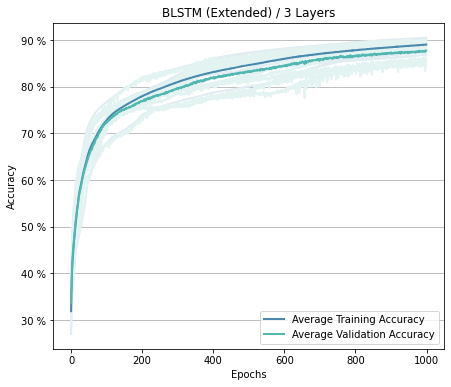

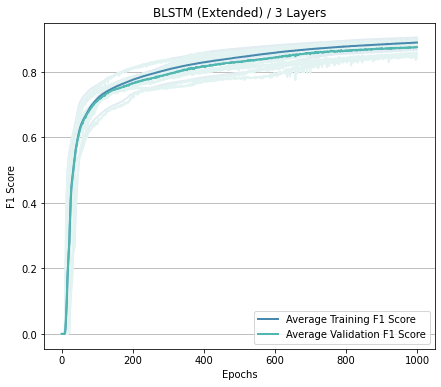

In [25]:
# BLSTM Extended Experiment 3

blstm3 = []
for key in ALL_DATA.keys():
    if 'blstm_level_3_extended/' in key:
        blstm3.append(key)
        
blstm3_train_time = np.mean(get_time_in_seconds(blstm3, 'train'))
blstm3_valid_time = np.mean(get_time_in_seconds(blstm3, 'valid'))
print(f'Average Training Time: {blstm3_train_time}, Average Validation Time: {blstm3_valid_time}')

plot_all_and_average_accuracy(blstm3, 'BLSTM (Extended) / 3 Layers', save='blstm3_ext_acc.png')
plot_all_and_average_f1(blstm3, 'BLSTM (Extended) / 3 Layers', save='blstm3_ext_f1.png')

Average Training Time: 5657.033476805687, Average Validation Time: 5649.234809803963


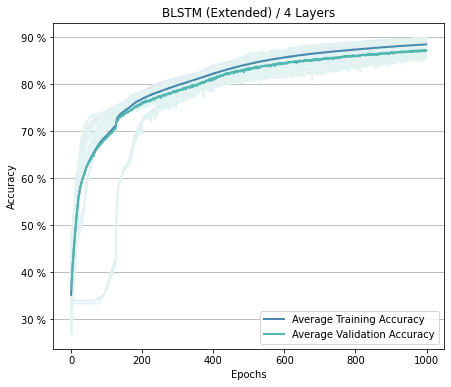

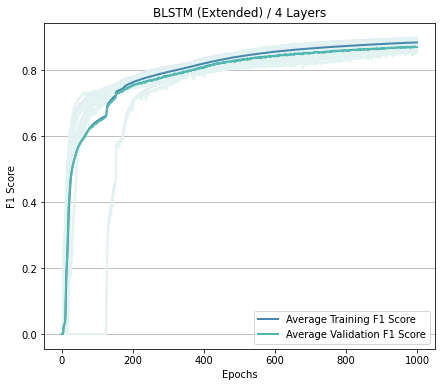

In [26]:
# BLSTM Extended Experiment 4

blstm4 = []
for key in ALL_DATA.keys():
    if 'blstm_level_4_extended/' in key:
        blstm4.append(key)
        
blstm4_train_time = np.mean(get_time_in_seconds(blstm4, 'train'))
blstm4_valid_time = np.mean(get_time_in_seconds(blstm4, 'valid'))
print(f'Average Training Time: {blstm4_train_time}, Average Validation Time: {blstm4_valid_time}')

plot_all_and_average_accuracy(blstm4, 'BLSTM (Extended) / 4 Layers', save='blstm4_ext_acc.png')
plot_all_and_average_f1(blstm4, 'BLSTM (Extended) / 4 Layers', save='blstm4_ext_f1.png')

Average Training Time: 6941.637763500214, Average Validation Time: 6932.139084386826


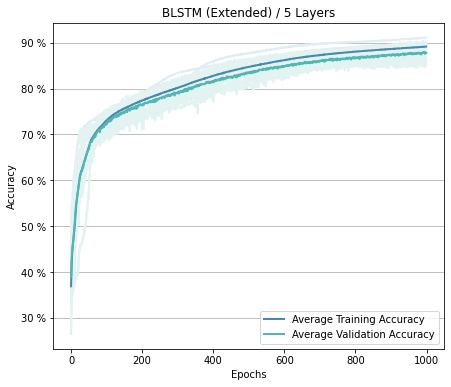

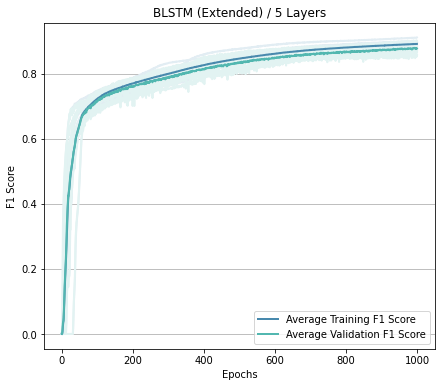

In [27]:
# BLSTM Extended Experiment 5

blstm5 = []
for key in ALL_DATA.keys():
    if 'blstm_level_5_extended/' in key:
        blstm5.append(key)
        
blstm5_train_time = np.mean(get_time_in_seconds(blstm5, 'train'))
blstm5_valid_time = np.mean(get_time_in_seconds(blstm5, 'valid'))
print(f'Average Training Time: {blstm5_train_time}, Average Validation Time: {blstm5_valid_time}')

plot_all_and_average_accuracy(blstm5, 'BLSTM (Extended) / 5 Layers', save='blstm5_ext_acc.png')
plot_all_and_average_f1(blstm5, 'BLSTM (Extended) / 5 Layers', save='blstm5_ext_f1.png')

Saving the maximum average accuracy and run time per experiment for later analysis

In [28]:
acc_data_layer_1 = get_f1_data_numpy(blstm1, 'valid')
acc_data_layer_2 = get_f1_data_numpy(blstm2, 'valid')
acc_data_layer_3 = get_f1_data_numpy(blstm3, 'valid')
acc_data_layer_4 = get_f1_data_numpy(blstm4, 'valid')
acc_data_layer_5 = get_f1_data_numpy(blstm5, 'valid')

acc_mean_1 = np.max(np.mean(acc_data_layer_1, axis=0))
acc_mean_2 = np.max(np.mean(acc_data_layer_2, axis=0))
acc_mean_3 = np.max(np.mean(acc_data_layer_3, axis=0))
acc_mean_4 = np.max(np.mean(acc_data_layer_4, axis=0))
acc_mean_5 = np.max(np.mean(acc_data_layer_5, axis=0))
acc_blstm_ext_arr_mean = [acc_mean_1, acc_mean_2, acc_mean_3, acc_mean_4, acc_mean_5]

acc_max_1 = np.max(acc_data_layer_1)
acc_max_2 = np.max(acc_data_layer_2)
acc_max_3 = np.max(acc_data_layer_3)
acc_max_4 = np.max(acc_data_layer_4)
acc_max_5 = np.max(acc_data_layer_5)
acc_blstm_ext_arr_max = [acc_max_1, acc_max_2, acc_max_3, acc_max_4, acc_max_5]

In [29]:
f1_data_layer_1 = get_f1_data_numpy(blstm1, 'valid')
f1_data_layer_2 = get_f1_data_numpy(blstm2, 'valid')
f1_data_layer_3 = get_f1_data_numpy(blstm3, 'valid')
f1_data_layer_4 = get_f1_data_numpy(blstm4, 'valid')
f1_data_layer_5 = get_f1_data_numpy(blstm5, 'valid')

f1_mean_1 = np.max(np.mean(f1_data_layer_1, axis=0))
f1_mean_2 = np.max(np.mean(f1_data_layer_2, axis=0))
f1_mean_3 = np.max(np.mean(f1_data_layer_3, axis=0))
f1_mean_4 = np.max(np.mean(f1_data_layer_4, axis=0))
f1_mean_5 = np.max(np.mean(f1_data_layer_5, axis=0))
f1_blstm_ext_arr_mean = [f1_mean_1, f1_mean_2, f1_mean_3, f1_mean_4, f1_mean_5]

f1_max_1 = np.max(f1_data_layer_1)
f1_max_2 = np.max(f1_data_layer_2)
f1_max_3 = np.max(f1_data_layer_3)
f1_max_4 = np.max(f1_data_layer_4)
f1_max_5 = np.max(f1_data_layer_5)
f1_blstm_ext_arr_max = [f1_max_1, f1_max_2, f1_max_3, f1_max_4, f1_max_5]

In [30]:
blstm_ext_time = [blstm1_train_time, blstm2_train_time, blstm3_train_time, blstm4_train_time, blstm5_train_time]

Helper function to plot average training time and average accuracy per increasing layers for different experiment types

In [31]:
labels = ['One Layer', 'Two Layers', 'Three Layers', 'Four Layers', 'Five Layers']
colors = ['#4889AD', '#4889AD', '#4889AD']
markers = ['d', 's', 'o']
linestyles = ['-', '--', '-.']
x = [0, 1, 2, 3, 4]

def plot_time_per_layer(data, save=False):
    fig = plt.figure(dpi=300 if HIGH_QUALITY_IMAGES else 72, figsize=(7, 6))
    plt.xticks(x, labels, rotation='0')
    plt.ylabel('Average Training Time (Seconds)')
    plt.rcParams['savefig.facecolor'] = 'w'
    plt.grid(axis='y')
    plt.grid(axis='y', which='minor', lw=0.5, c='#ccc')
    ax = fig.gca()
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: f'{x:.0f}'))
    ax.yaxis.set_minor_formatter(tick.FuncFormatter(lambda x,y: f'{x:.0f}'))
    ax.tick_params(axis='both', which='minor', labelsize=5)
    for idx, item in enumerate(data):
        plt.plot(item['list'], label=item['name'], color=colors[idx], linestyle=linestyles[idx], marker=markers[idx])
    plt.legend(loc = 'right', bbox_to_anchor=(1, 0.3))
    if save:
        plt.savefig(save)
    else:
        plt.show()

def plot_accuracy_per_layer(data, save=False):
    fig = plt.figure(dpi=300 if HIGH_QUALITY_IMAGES else 72, figsize=(7, 6))
    plt.xticks(x, labels, rotation='0')
    plt.ylabel('Average Accuracy')
    plt.rcParams['savefig.facecolor'] = 'w'
    plt.grid(axis='y')
    ax = fig.gca()
    ax.set_yticks(np.arange(0, 1., 0.01))
    ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: f'{y} %'))
    for idx, item in enumerate(data):
        plt.plot(item['list'], label=item['name'], color=colors[idx], linestyle=linestyles[idx], marker=markers[idx])
    plt.legend()
    if save:
        plt.savefig(save)
    else:
        plt.show()

def plot_f1_per_layer(data, save=False):
    fig = plt.figure(dpi=300 if HIGH_QUALITY_IMAGES else 72, figsize=(7, 6))
    plt.xticks(x, labels, rotation='0')
    plt.ylabel('Average F1 Score')
    plt.rcParams['savefig.facecolor'] = 'w'
    plt.grid(axis='y')
    ax = fig.gca()
    ax.set_yticks(np.arange(0, 1., 0.01))
    #ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda x,y: f'{y} %'))
    for idx, item in enumerate(data):
        plt.plot(item['list'], label=item['name'], color=colors[idx], linestyle=linestyles[idx], marker=markers[idx])
    plt.legend()
    if save:
        plt.savefig(save)
    else:
        plt.show()

Creating average per increasing layer plots

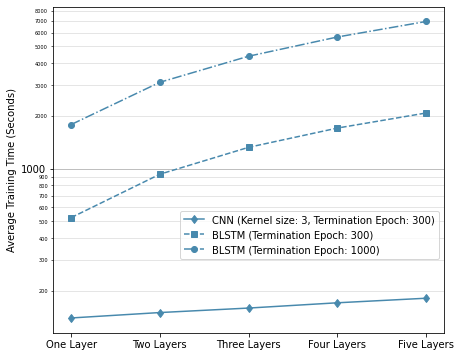

In [32]:
data = [
    {'name': 'CNN (Kernel size: 3, Termination Epoch: 300)' ,'list': cnn_time},
    {'name': 'BLSTM (Termination Epoch: 300)' ,'list': blstm_time},
    {'name': 'BLSTM (Termination Epoch: 1000)' ,'list': blstm_ext_time}
]
plot_time_per_layer(data, save='avg_time.pdf')

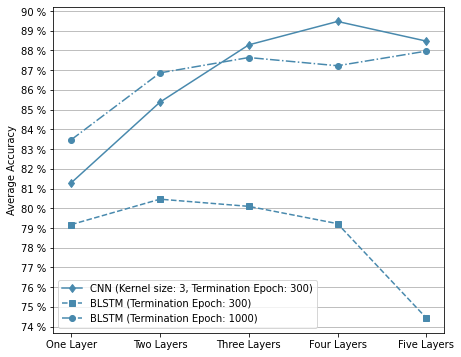

In [33]:
data = [
    {'name': 'CNN (Kernel size: 3, Termination Epoch: 300)' ,'list': acc_cnn_arr_mean},
    {'name': 'BLSTM (Termination Epoch: 300)' ,'list': acc_blstm_arr_mean},
    {'name': 'BLSTM (Termination Epoch: 1000)' ,'list': acc_blstm_ext_arr_mean}
]
plot_accuracy_per_layer(data, save='avg_acc.pdf')

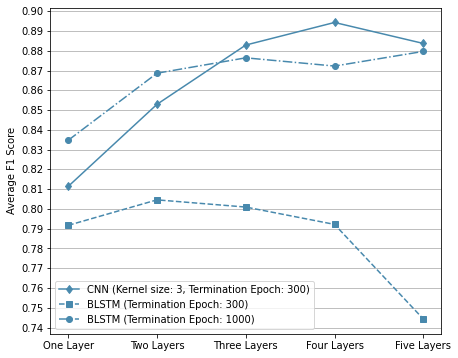

In [34]:
data = [
    {'name': 'CNN (Kernel size: 3, Termination Epoch: 300)' ,'list': f1_cnn_arr_mean},
    {'name': 'BLSTM (Termination Epoch: 300)' ,'list': f1_blstm_arr_mean},
    {'name': 'BLSTM (Termination Epoch: 1000)' ,'list': f1_blstm_ext_arr_mean}
]
plot_f1_per_layer(data, save='avg_f1.pdf')

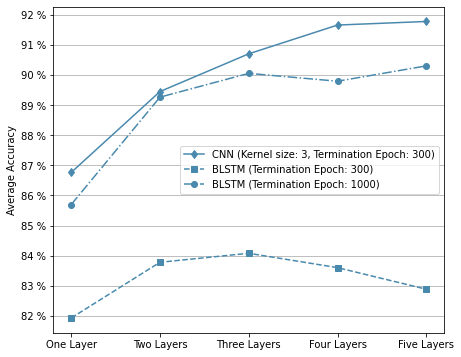

In [35]:
data = [
    {'name': 'CNN (Kernel size: 3, Termination Epoch: 300)' ,'list': acc_cnn_arr_max},
    {'name': 'BLSTM (Termination Epoch: 300)' ,'list': acc_blstm_arr_max},
    {'name': 'BLSTM (Termination Epoch: 1000)' ,'list': acc_blstm_ext_arr_max}
]
plot_accuracy_per_layer(data)

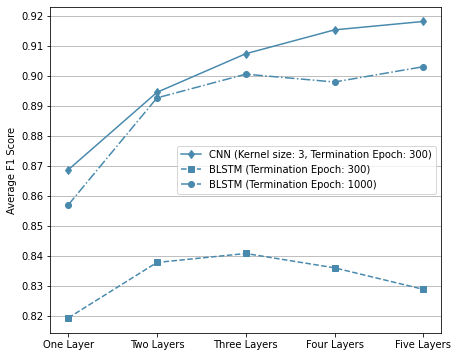

In [36]:
data = [
    {'name': 'CNN (Kernel size: 3, Termination Epoch: 300)' ,'list': f1_cnn_arr_max},
    {'name': 'BLSTM (Termination Epoch: 300)' ,'list': f1_blstm_arr_max},
    {'name': 'BLSTM (Termination Epoch: 1000)' ,'list': f1_blstm_ext_arr_max}
]
plot_f1_per_layer(data)